# Project 8 - Data Wrangling for Twitter - WeRateDog Data

This is a project for Udacity Data Analyst Nanodegree Lesson8.

### Part 0- Importing required packages
The following are the python packages required for this project:
- pandas
- numPy
- matplotlib
- requests
- tweepy
- json
- seaborn (optional)

**note: install Tweepy on Anaconda**
- https://stackoverflow.com/questions/18675907/how-to-run-conda
- https://anaconda.org/conda-forge/tweepy


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import tweepy
import json
import requests
import os
from datetime import datetime

### Part 1- Gathering Data
There are 3 sources of gathering the data needed for this project:
- 1- [manually] WeRateDogs' Twitter archive - `twitter-archive-enhanced.csv` provided by Udacity - gathered by manually downloading it
- 2- [programmatically] Tweet image predictions - `image_predictions.tsv` created by Udacity - gathered using `request()` function in Python
- 3- [programmatically] WeRateDogs Twitter data - `tweet_json.txt` - gathered using Tweepy, Twitter API

In [2]:
# 1-1: WeRateDogs Twitter Archive
wrd = pd.read_csv('twitter-archive-enhanced.csv')
wrd.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
wrd.shape[0]

2356

In [4]:
# 1-2 (1) Using Request to get all the tsv data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
# 1-2 (2) using the `with open() as file` to store http response into a file
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
# 1-2 (3) check if the tsv file is successfully generated in the folder
os.listdir()

['twitter_archive_master.csv',
 'twitter-archive-enhanced.csv',
 'wrangle_act.ipynb',
 'wrangle_report.html',
 'wrangle_report.ipynb',
 'image-predictions.tsv',
 '.ipynb_checkpoints',
 'tweet_json.txt',
 'act_report.ipynb',
 'act_report.html']

In [7]:
# 1-2 (4) read tsv file using Pandas
prediction = pd.read_csv('image-predictions.tsv', sep='\t')
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
# 1-3: Using Tweepy to get Tweeter retweet datas, Twitter API.
# 1-3 (1) set auth keys, secret

# https://apps.twitter.com/app/15689954/keys
#  =============== Do not submit ===============
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
# =============== Do not submit ===============

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

- Using the tweet IDs in the WeRateDogs Twitter archive
- Query the Twitter API for each tweet's JSON data using Python's Tweepy library
- Store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
- Each tweet's JSON data should be written to its own line. 
- Read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [9]:
tw_id = wrd.copy()
filename = 'tweet_json.txt'

In [9]:
if not os.path.exists(filename): 
    with open(filename, 'w') as f:
        data = {}
        data = {'0':{'id':'0','retweet': '0', 'favorite' : '0'}}
        json.dump(data, f)
    f.closed
    
for i,v in enumerate(tw_id['tweet_id']):
    try:
        results = api.get_status(v)
    except:
        pass

    tweet_json = {str(i) : {'id': str(v),'retweet': results.retweet_count, 'favorite' : results.favorite_count}}

    with open(filename) as fa:
        old_data = json.load(fa)    
    data.update(tweet_json)

    with open(filename, 'w') as out:
        json.dump(data, out, indent=2)
    out.closed
print("success get retweet data")

success get retweet data


In [10]:
wrd_api = pd.read_json(filename)
wrd_api

,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
favorite,38596,33092,30545,14714,6210,7098,3162,3006,5195,1475,...,2964,5084,4542,6507,2331,5595,8249,3975,3931,15109
id,892420643555336192,892177421306343424,890006608113172480,872820683541237760,747963614829678592,747933425676525568,747885874273214464,747844099428986880,747816857231626240,747651430853525504,...,748705597323898880,748699167502000128,748692773788876800,748575535303884800,748568946752774144,748346686624440320,748337862848962560,748324050481647616,748307329658011648,748220828303695872
retweet,8531,6274,7343,3719,2362,2796,1090,819,1276,172,...,1036,1759,1457,2188,734,1352,4525,841,785,8540


### Part 2- Assessing Data

#### Visual Assessment

In [11]:
wrd

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
wrd_api

,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
favorite,38596,33092,30545,14714,6210,7098,3162,3006,5195,1475,...,2964,5084,4542,6507,2331,5595,8249,3975,3931,15109
id,892420643555336192,892177421306343424,890006608113172480,872820683541237760,747963614829678592,747933425676525568,747885874273214464,747844099428986880,747816857231626240,747651430853525504,...,748705597323898880,748699167502000128,748692773788876800,748575535303884800,748568946752774144,748346686624440320,748337862848962560,748324050481647616,748307329658011648,748220828303695872
retweet,8531,6274,7343,3719,2362,2796,1090,819,1276,172,...,1036,1759,1457,2188,734,1352,4525,841,785,8540


#### Progammatic Assessment

-  wrd archive

In [14]:
wrd.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
117,870063196459192321,NaN,NaN,2017-05-31 23:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clifford. He's quite large. Also red. Goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,None,None,None,None
969,750132105863102464,NaN,NaN,2016-07-05 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stewie. He will roundhouse kick anyone...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750132105...,11,10,Stewie,None,None,None,None
785,775085132600442880,NaN,NaN,2016-09-11 21:34:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None


In [15]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
wrd['name'].value_counts()[:10]

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Name: name, dtype: int64

In [17]:
wrd['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

-  prediction

In [18]:
prediction.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
339,672245253877968896,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,Chihuahua,0.718944,True,badger,0.178546,False,toy_terrier,0.037103,True
1585,797545162159308800,https://pbs.twimg.com/media/CxFzFAAUAAA5C9z.jpg,1,Pembroke,0.954089,True,Cardigan,0.033644,True,papillon,0.009736,True
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True


In [19]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
prediction['p1'].value_counts()[:10]

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

-  wrd api

In [22]:
wrd_api.sample(3)

,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
retweet,8531,6274,7343,3719,2362,2796,1090,819,1276,172,...,1036,1759,1457,2188,734,1352,4525,841,785,8540
id,892420643555336192,892177421306343424,890006608113172480,872820683541237760,747963614829678592,747933425676525568,747885874273214464,747844099428986880,747816857231626240,747651430853525504,...,748705597323898880,748699167502000128,748692773788876800,748575535303884800,748568946752774144,748346686624440320,748337862848962560,748324050481647616,748307329658011648,748220828303695872
favorite,38596,33092,30545,14714,6210,7098,3162,3006,5195,1475,...,2964,5084,4542,6507,2331,5595,8249,3975,3931,15109


In [23]:
wrd_api.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, favorite to retweet
Columns: 2356 entries, 0 to 999
dtypes: int64(2356)
memory usage: 55.2+ KB


#### Quality Issues >>

##### wrd archive
- (1) There are 55 status having incorrect name: "a", "an".

- (2) Some entries has the wrong expanded_urls - "gofundme.com" instead of "twitter.com".

- (3) There are 59 status missing "expanded_urls".

- (4) Change all the null values to be NaN in 'name', 'doggo', 'floofer', 'pupper', 'puppo' columns.

- (5) The rating_numerator contains ratings that should sometimes be in decimals, but are incorrectly parsed. This value should be a float.

- (6) Some ratings are incorrectly retrieved from other fractions, e.g. row 2335 - 1/2

- (7) IDs columns should be strings instead of integers.

##### prediction
- (8) Some of the prediction results starts with capital letters. e.g. Labrador_retriever.

#### Tidiness Issues >>
##### wrd archive
- (1) doggo, floofer, pupper, puppo should be in the same column named: "type".

##### wrd_api
- (2) Convert columns into rows in wrd_api dataframe.

### Part 3- Cleaning Data

####  ============== Quality ==============

> (1) There are 55 status having incorrect name: "a", "an"

#### Define

Replace "a" or "an" with proper name or null

#### Code

In [24]:
wrd.query('name == "a"')['text']

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

In [25]:
wrd.query('name == "an"')['text']

759     RT @dog_rates: This is an East African Chalupa...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1362    This is an East African Chalupa Seal. We only ...
2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

From the above, we can see that status with the name "a" or "an" are for those status without names.
Let's change them to NaN.

In [26]:
wrd_clean = wrd.copy()
wrd_clean['name'] = wrd_clean['name'].apply(lambda x: 'NaN' if x == "a" else x)
wrd_clean['name'] = wrd_clean['name'].apply(lambda x: 'NaN' if x == "an" else x)

#### Test

In [27]:
wrd_clean.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [28]:
wrd_clean.query('name == "an"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> (2) some entry has the wrong expanded_urls - "gofundme.com" instead of "twitter.com"

> (3) There are 59 status missing "expanded_urls"

#### Define

- Fill all the NaN with "https://twitter.com/dog_rates/status/.../" urls
- Replace "godfundme" with "https://twitter.com/dog_rates/status/.../" urls

#### Code

In [29]:
wrd_clean['expanded_urls'][0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [30]:
wrd_clean['expanded_urls'] = wrd_clean['tweet_id'].apply(lambda x: 'https://twitter.com/dog_rates/status/'+str(x)+'/photo/1')

#### Test

In [31]:
wrd_clean['expanded_urls'].isnull().sum()

0

In [32]:
wrd_clean['expanded_urls'].str.contains('https://gofundme.com/').sum()

0

In [33]:
wrd_clean['expanded_urls'].str.contains('https://www.gofundme.com/').sum()

0

> (4) Change all the null values to be NaN in 'name', 'doggo', 'floofer', 'pupper', 'puppo' columns.

#### Define

Change all `None` values to `NaN` in 'name', 'doggo', 'floofer', 'pupper', 'puppo' columns.

#### Code

In [34]:
wrd_clean['name'] = wrd_clean['name'].apply(lambda x: 'NaN' if x == "None" else x)
wrd_clean['doggo'] = wrd_clean['doggo'].apply(lambda x: 'NaN' if x == "None" else x)
wrd_clean['floofer'] = wrd_clean['floofer'].apply(lambda x: 'NaN' if x == "None" else x)
wrd_clean['pupper'] = wrd_clean['pupper'].apply(lambda x: 'NaN' if x == "None" else x)
wrd_clean['puppo'] = wrd_clean['puppo'].apply(lambda x: 'NaN' if x == "None" else x)

#### Test

In [35]:
wrd_clean['name'].value_counts()[:10]

NaN        807
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
Name: name, dtype: int64

In [36]:
wrd_clean['doggo'].value_counts()[:10]

NaN      2259
doggo      97
Name: doggo, dtype: int64

In [37]:
wrd_clean['floofer'].value_counts()[:10]

NaN        2346
floofer      10
Name: floofer, dtype: int64

In [38]:
wrd_clean['pupper'].value_counts()[:10]

NaN       2099
pupper     257
Name: pupper, dtype: int64

In [39]:
wrd_clean['puppo'].value_counts()[:10]

NaN      2326
puppo      30
Name: puppo, dtype: int64

> (5) The rating_numerator contains ratings that should sometimes be in decimals, but are incorrectly parsed. This value should be a float.

> (6) Some ratings are incorrectly retrieved from other fractions, e.g. row 2335 - 1/2

#### Define

- Use regular expression to extract rating data from `text` column.
- Change the data type of `rating_numerator` into float.

#### Code

In [40]:
wrd_clean['rating_numerator'] = wrd_clean['text'].str.extract(r'(\d+\.?\d+?/\d+\.?\d+?)',expand=False)
wrd_clean['rating_denominator'] = wrd_clean['text'].str.extract(r'(\d+\.?\d+?/\d+\.?\d+?)',expand=False)

In [41]:
wrd_clean['rating_numerator'] = wrd_clean['rating_numerator'].astype('str').apply(lambda x: x.split('/')[0]).astype('float')
wrd_clean['rating_denominator'] = wrd_clean['rating_denominator'].astype('str').apply(lambda x: x if x == 'nan' else x.split('/')[1]).astype('float')

#### Test

In [42]:
wrd_clean['rating_numerator'].describe()

count    1926.000000
mean       14.389943
std        50.595122
min         7.000000
25%        11.000000
50%        12.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [43]:
wrd_clean['rating_denominator'].describe()

count    1926.000000
mean       10.550883
std         7.447706
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [44]:
wrd_clean.query('rating_numerator == 9.75')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/832215909...,9.75,10.0,Logan,NaN,NaN,NaN,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,NaN,NaN,NaN,NaN


> (7) IDs columns should be strings instead of integers.

#### Define
- Change `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` columns in wrd_clean dataframe into strings.
- Change `tweet_id` column in prediction_clean data frame into strings.

#### Code

In [45]:
wrd_clean['tweet_id'] = wrd_clean['tweet_id'].astype('str')
wrd_clean['in_reply_to_status_id'] = wrd_clean['in_reply_to_status_id'].astype('str')
wrd_clean['in_reply_to_user_id'] = wrd_clean['in_reply_to_user_id'].astype('str')
wrd_clean['retweeted_status_id'] = wrd_clean['retweeted_status_id'].astype('str')
wrd_clean['retweeted_status_user_id'] = wrd_clean['retweeted_status_user_id'].astype('str')

In [46]:
prediction_clean = prediction.copy()
prediction_clean['tweet_id'] = prediction_clean['tweet_id'].astype('str')

#### Test

In [47]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              1926 non-null float64
rating_denominator            1926 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), objec

In [48]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


> (8) Some of the prediction results starts with capital letters. e.g. Labrador_retriever.

#### Define
- apply all the prediction into lower case.

#### Code

In [49]:
prediction_clean['p1'][:10]

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
5      Bernese_mountain_dog
6                box_turtle
7                      chow
8             shopping_cart
9          miniature_poodle
Name: p1, dtype: object

In [50]:
prediction_clean['p1'] = prediction_clean['p1'].apply(lambda x: x.lower())
prediction_clean['p2'] = prediction_clean['p2'].apply(lambda x: x.lower())
prediction_clean['p3'] = prediction_clean['p3'].apply(lambda x: x.lower())

#### Test

In [51]:
prediction_clean['p1']

0            welsh_springer_spaniel
1                           redbone
2                   german_shepherd
3               rhodesian_ridgeback
4                miniature_pinscher
5              bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    gordon_setter
12                     walker_hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english_setter
17                              hen
18                 desktop_computer
19                italian_greyhound
20                      maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_terrier
27                        ch

In [52]:
prediction_clean['p2']

0                         collie
1             miniature_pinscher
2                       malinois
3                        redbone
4                     rottweiler
5               english_springer
6                     mud_turtle
7                tibetan_mastiff
8                shopping_basket
9                       komondor
10               tibetan_mastiff
11             yorkshire_terrier
12              english_foxhound
13                  bull_mastiff
14               german_shepherd
15                      shih-tzu
16                  newfoundland
17                          cock
18                          desk
19                   toy_terrier
20                    toy_poodle
21                         otter
22                  newfoundland
23      chesapeake_bay_retriever
24                siberian_husky
25                         skunk
26                  afghan_hound
27                   toy_terrier
28                    bloodhound
29                    barracouta
          

In [53]:
prediction_clean['p3']

0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
5        greater_swiss_mountain_dog
6                          terrapin
7                          fur_coat
8                  golden_retriever
9       soft-coated_wheaten_terrier
10               labrador_retriever
11                         pekinese
12                     ibizan_hound
13                   french_bulldog
14                         malinois
15                   dandie_dinmont
16                           borzoi
17                        partridge
18                         bookcase
19                          basenji
20                 miniature_poodle
21                   great_grey_owl
22                      groenendael
23               labrador_retriever
24                       eskimo_dog
25                          hamster
26                           briard
27                         p

####  ============== Tidiness ==============

> (1) wrd archive- doggo, floofer, pupper, puppo should be in the same column -- type

#### Define

Gather 'doggo', 'floofer', 'pupper', 'puppo' into a column: type

#### Code

In [54]:
wrd_tidy = wrd_clean.copy()
wrd_tidy['tmp1'] = wrd_tidy['doggo'].apply(lambda x: "doggo" if x == "doggo" else "")
wrd_tidy['tmp2'] = wrd_tidy['floofer'].apply(lambda x: "floofer" if x == "floofer" else "")
wrd_tidy['tmp3'] = wrd_tidy['pupper'].apply(lambda x: "pupper" if x == "pupper" else "")
wrd_tidy['tmp4'] = wrd_tidy['puppo'].apply(lambda x: "puppo" if x == "puppo" else "")
wrd_tidy['type'] = wrd_tidy['tmp1'] + wrd_tidy['tmp2'] + wrd_tidy['tmp3'] + wrd_tidy['tmp4']
wrd_tidy['type'] = wrd_tidy['type'].apply(lambda x: "NaN" if x == "" else x )
wrd_tidy.drop(['tmp1','tmp2','tmp3','tmp4', 'doggo', 'floofer', 'pupper', 'puppo'],inplace=True,axis=1)

#### Test

In [55]:
wrd_tidy['type'].value_counts()

NaN             1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: type, dtype: int64

> (2) wrd_api- Convert columns into rows

#### Define

Transpose wrd_api dataframe

#### Code

In [56]:
wrd_api

,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
favorite,38596,33092,30545,14714,6210,7098,3162,3006,5195,1475,...,2964,5084,4542,6507,2331,5595,8249,3975,3931,15109
id,892420643555336192,892177421306343424,890006608113172480,872820683541237760,747963614829678592,747933425676525568,747885874273214464,747844099428986880,747816857231626240,747651430853525504,...,748705597323898880,748699167502000128,748692773788876800,748575535303884800,748568946752774144,748346686624440320,748337862848962560,748324050481647616,748307329658011648,748220828303695872
retweet,8531,6274,7343,3719,2362,2796,1090,819,1276,172,...,1036,1759,1457,2188,734,1352,4525,841,785,8540


In [57]:
wrd_api_clean = wrd_api.copy()
wrd_api_clean = wrd_api_clean.transpose().sort_index(ascending=True)
wrd_api_clean = wrd_api_clean[['id','favorite','retweet']]
wrd_api_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [58]:
wrd_api_clean

,tweet_id,favorite,retweet
0,892420643555336192,38596,8531
1,892177421306343424,33092,6274
2,891815181378084864,24914,4156
3,891689557279858688,42013,8655
4,891327558926688256,40155,9412
5,891087950875897856,20133,3113
6,890971913173991424,11802,2074
7,890729181411237888,65227,18912
8,890609185150312448,27666,4272
9,890240255349198848,31798,7427


### Part 4- Insights & Visualization

#### Analysis

In [59]:
wrd_tidy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN


In [60]:
prediction_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [61]:
wrd_api_clean.head(3)

,tweet_id,favorite,retweet
0,892420643555336192,38596,8531
1,892177421306343424,33092,6274
2,891815181378084864,24914,4156


#### Insights

In [62]:
wrd_tidy['hour'] = wrd_tidy['timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S +0000").hour)

Q1: According to the data we have, when is more prefferable by WeRateDog's fans?

In [63]:
wrd_tidy2 = wrd_tidy.copy()
wrd_api_clean2 = wrd_api_clean.copy()
wrd_api_clean2.rename(columns={'tweet_id':'id'}, inplace=True)
wrd_full = pd.concat([wrd_tidy2, wrd_api_clean2], join = 'outer', axis=1)
wrd_full.drop(['id'],axis=1,inplace= True)
wrd_full.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type,hour,favorite,retweet
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,16,38596,8531
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,0,33092,6274
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,0,24914,4156
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,15,42013,8655
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,16,40155,9412


In [64]:
wrd_full['favorite'].describe()

count      2356.000000
mean       8030.370119
std       12126.142180
min           0.000000
25%        1463.750000
50%        3659.000000
75%        9446.250000
max      142629.000000
Name: favorite, dtype: float64

In [65]:
wrd_full.query('favorite > 9447')['hour'].value_counts()

0     110
16    105
1      79
17     61
18     41
15     34
23     32
19     23
22     23
2      23
20     19
21     18
3      13
4       3
5       2
13      1
6       1
14      1
Name: hour, dtype: int64

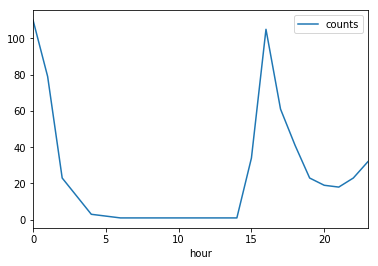

In [66]:
wrd_full.query('favorite > 9447')['hour'].value_counts().rename_axis('hour').reset_index(name='counts').sort_values(by=['hour']).plot(x="hour",y="counts");

> From the analysis, we know that it seems like top favorite posts happened in afternoon(16~17) and midnight(0~1).

Q2: What are the top predictions for the photo?

In [67]:
prediction_clean.p1.value_counts()[:20].rename_axis('prediction').reset_index(name='counts')

,prediction,counts
0,golden_retriever,150
1,labrador_retriever,100
2,pembroke,89
3,chihuahua,83
4,pug,57
5,chow,44
6,samoyed,43
7,toy_poodle,39
8,pomeranian,38
9,malamute,30


> From the above table, we know that top predictions for WeRateDog images are "golden_retriever", "labrador_retriever" and "pembroke".

#### Q3: Which year has more top posts? 2015, 2016, 2017?

In [68]:
wrd_full['year'] = wrd_full['timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S +0000").year)

In [69]:
wrd_full.groupby(['year'])['favorite'].mean()

year
2015     2318.933333
2016     6845.527473
2017    19091.571429
Name: favorite, dtype: float64

> From the above, we know that 2017 has more top posts compare to 2015 and 2016.

In [70]:
wrd_full2 = wrd_full.copy()
prediction_clean3 = prediction_clean.copy()
wrd_prediction = wrd_full2.merge(prediction_clean3, on='tweet_id', how = 'left')
wrd_prediction.drop(['source','in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp','retweeted_status_user_id'],axis=1,inplace= True)
wrd_prediction.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,type,hour,favorite,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,16,38596,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,0,33092,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,0,24914,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,15,42013,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,16,40155,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [71]:
wrd_prediction.to_csv('twitter_archive_master.csv')

### Part 5- Conclusion

From the analysis, we find the most active hours for WeRateDog fans are 0~1 and 16~17. 

We also found the most popular dog types are "golden_retriever", "labrador_retriever" and "pembroke" according to the image prediction.

Finally, we know that in 2017, WeRateDog generate more top posts compared to previous years. 

### Part 6- Limitations

There are some limitations to the analysis:

- Completeness of the data:

There are still many null values in WeRateDog Archive, this may effect the aspects we can abalyze.

- Limitations of Twitter API

Some of the data we are interested cannot be found from that status data we get from Twitter API using Tweepy. For example, the data doesn't contains the amount of comments in each status.

### Part 7- Reference
- [Tweepy](http://tweepy.readthedocs.io/en/v3.6.0/api.html#status-methods)
- [Retweeters of a Twitter status in Tweepy](https://stackoverflow.com/questions/17724988/retweeters-of-a-twitter-status-in-tweepy)
- [How to Generate API Key, Consumer Token, Access Key for Twitter OAuth]( https://themepacific.com/how-to-generate-api-key-consumer-token-access-key-for-twitter-oauth/994/)
- [How do I check whether a file exists?](https://stackoverflow.com/questions/82831/how-do-i-check-whether-a-file-exists)
- [How to append in a json file in Python](https://stackoverflow.com/questions/18980039/how-to-append-in-a-json-file-in-python)
- [Create an empty file](https://knowledge.safe.com/questions/22864/startup-python-script-how-can-i-create-an-empty-fi.html)
- [How to dynamically build a JSON object with Python?](https://stackoverflow.com/questions/23110383/how-to-dynamically-build-a-json-object-with-python)
- [Python - Appending JSON object to exisiting JSON object](https://stackoverflow.com/questions/42078161/python-appending-json-object-to-exisiting-json-object)
- [how to add element to json list - python](https://stackoverflow.com/questions/30350450/how-to-add-element-to-json-list-python/30350531)
- [Python Programming/Exceptions](https://en.wikibooks.org/wiki/Python_Programming/Exceptions)
- [Convert Tweepy Status object into JSON](https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json)
- [Read a File Line-by-Line in Python](http://stackabuse.com/read-a-file-line-by-line-in-python/)
- [Official Input output Documentation](https://docs.python.org/2/tutorial/inputoutput.html)
- [Python JSON dump / append to .txt with each variable on new line](https://stackoverflow.com/questions/17055117/python-json-dump-append-to-txt-with-each-variable-on-new-line)